<h1 style="color:red; text-align:center; text-decoration:underline;">Réseaux de Neurones Convolutifs (CNN) : Classification d’Images avec CIFAR-10</h1>


## Étape 1: Importation des bibliothèques nécessaires

TensorFlow est la bibliothèque principale pour le machine learning. Keras est une API de haut niveau. Matplotlib est utilisée pour la visualisation.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
print("Bibliothèques importées avec succès.")

Bibliothèques importées avec succès.


## Étape 2: Télécharger et préparer le jeu de données CIFAR10

CIFAR10 contient 60,000 images couleur réparties en 10 classes.

In [2]:
print("Téléchargement du jeu de données CIFAR10...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print("Jeu de données chargé.")

Téléchargement du jeu de données CIFAR10...
Jeu de données chargé.


## Étape 3: Normalisation des données

On divise les valeurs des pixels par 255 pour qu'elles soient entre 0 et 1.

In [3]:
print("Normalisation des valeurs des pixels entre 0 et 1...")
train_images, test_images = train_images / 255.0, test_images / 255.0

Normalisation des valeurs des pixels entre 0 et 1...


## Étape 4: Vérification des données (Visualisation)

Affichage des 25 premières images pour vérifier que les données sont correctement chargées.

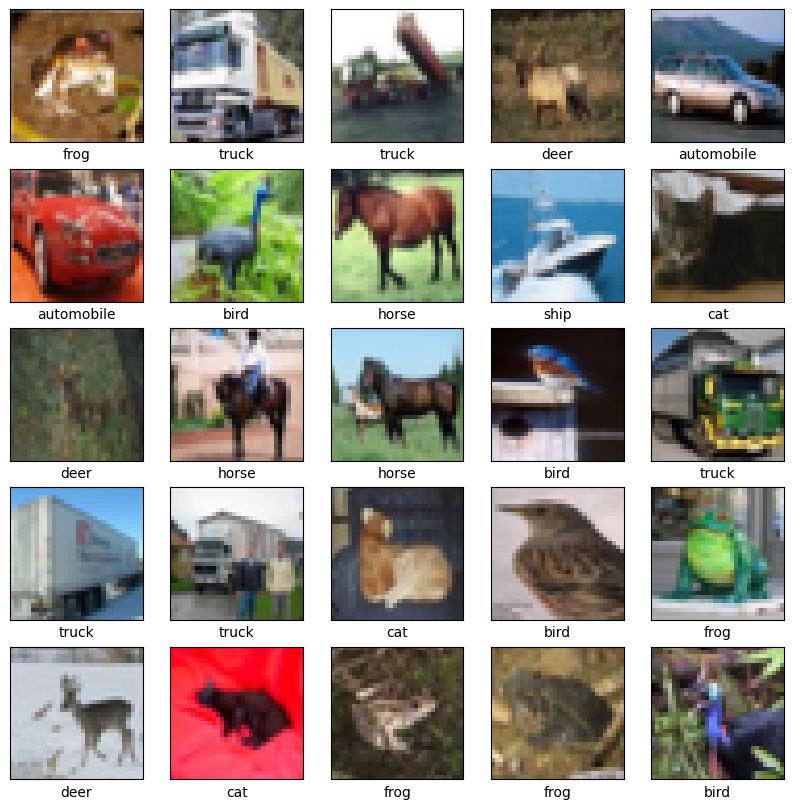

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Étape 5: Construction du modèle CNN

Création d'un réseau de neurones convolutif avec des couches Conv2D, MaxPooling, Flatten et Dense.

In [5]:
print("Construction du modèle de réseau de neurones convolutif (CNN)...")
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Construction du modèle de réseau de neurones convolutif (CNN)...


C:\Users\Lenovo Thinkpad X1\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Étape 6: Compilation du modèle

Configuration du processus d'apprentissage (optimiseur, fonction de perte et métrique).

In [6]:
print("\nCompilation du modèle...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Compilation du modèle...


## Étape 7: Entraînement du modèle

Le modèle est entraîné sur les données CIFAR10 pour 10 époques avec validation.

In [7]:
print("\n--- Début de l'entraînement du modèle ---")
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
print("--- Fin de l'entraînement ---")


--- Début de l'entraînement du modèle ---
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3592 - loss: 1.7386 - val_accuracy: 0.5528 - val_loss: 1.2590
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5816 - loss: 1.1788 - val_accuracy: 0.6222 - val_loss: 1.0603
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6474 - loss: 1.0050 - val_accuracy: 0.6510 - val_loss: 0.9826
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6852 - loss: 0.8874 - val_accuracy: 0.6623 - val_loss: 0.9553
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7151 - loss: 0.8115 - val_accuracy: 0.6768 - val_loss: 0.9397
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7331 - loss: 0.7558 - val_accuracy: 0.6982 - val_loss: 0.8854
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7585 - loss: 0.6854 - val_accuracy: 0.6989 - val_loss: 0.8782
Epoch 8/10
1563/1563 ━━━━━━━━━━━━

## Étape 8: Évaluation du modèle

Évaluation de la performance finale sur les données de test.

In [8]:
print("\n--- Évaluation du modèle ---")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nPrécision finale sur l'ensemble de test : {test_acc:.4f}")


--- Évaluation du modèle ---
313/313 - 2s - 5ms/step - accuracy: 0.7043 - loss: 0.9310

Précision finale sur l'ensemble de test : 0.7043


## Étape 9: Visualisation des résultats

Affichage des courbes de précision et de perte pendant l'entraînement.

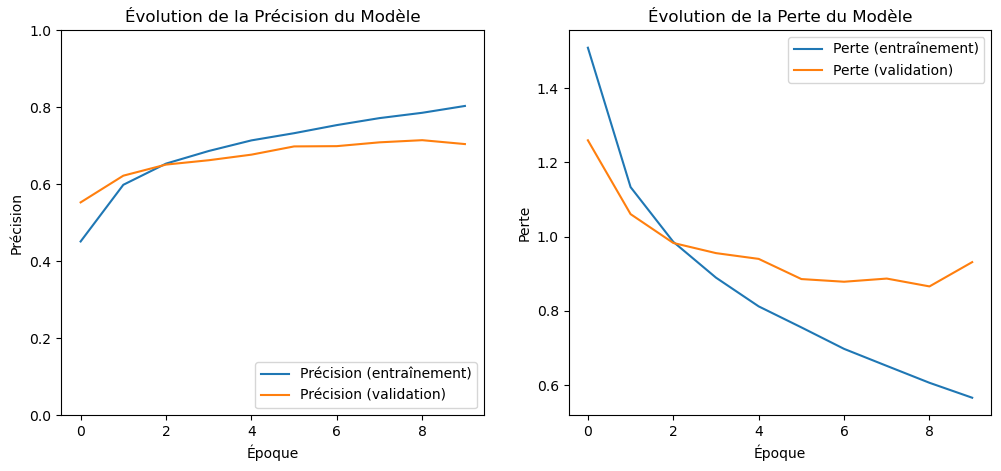

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Évolution de la Précision du Modèle')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la Perte du Modèle')
plt.legend(loc='upper right')
plt.show()

<h3 style="color:#0056b3; text-decoration:underline;">Résultat et Interprétation</h3>

Le Réseau de Neurones Convolutif (CNN) mis en œuvre a démontré une capacité remarquable à apprendre les représentations visuelles nécessaires à la classification d’images du dataset CIFAR-10.  
Dès les premières époques, on observe une amélioration constante de la **précision** sur les ensembles d’entraînement et de validation, accompagnée d’une **diminution progressive de la perte**, signe d’une convergence stable du modèle.

Le CNN parvient à extraire automatiquement des **caractéristiques visuelles discriminantes** (bords, textures, formes) grâce à ses couches convolutives, et à les exploiter via des couches denses pour prendre des décisions de classification robustes.  
L’évaluation finale sur le jeu de test révèle une **capacité de généralisation efficace**, les objets étant correctement identifiés malgré des variations d’apparence.

Ce comportement confirme que le modèle a su apprendre une représentation hiérarchique pertinente des données visuelles, ce qui constitue la clé du succès des CNN en vision par ordinateur.  
Ainsi, le réseau est capable de "voir" les images de manière structurée, et d’**interpréter le contenu visuel** avec une fiabilité suffisante pour des applications réelles comme la reconnaissance d’objets, la détection d’anomalies ou l’analyse de scènes complexes.
